# Equation Solving Tools

We can solve systems of equations exactly using sympy’s `solve` function. This is usually done using what is known as the residual form. The residual is simply the difference between the LHS and RHS of an equation, or put another way, we rewrite our equations to be equal to zero:

$$ \begin{align}
x + y &= z \\
\therefore x + y - z &= 0
\end{align}
$$

In [2]:
import sympy
sympy.init_printing()
%matplotlib inline

In [ ]:
x, y, z = sympy.symbols('x, y, z')
sympy.solve(x + y - z, z)

In [ ]:
equations = [x + y - z,
            2*x+y +z +2,
            x - y -z +2,]
unknowns = [x, y, z]

In [ ]:
solution = sympy.solve(equations, unknowns)
solution

In [ ]:
%%timeit
sympy.solve(equations, unknowns)

In [ ]:
solution[x]

In [ ]:
# floating point version
solution[x].n()

### 9.2 Special Case: Linear System

For linear systems like the one above, we can solve very efficiently using matrix algebra. The system of equations can be rewritten in matrix form:

$$ Ax = b$$

In [ ]:
equations

In [ ]:
A = sympy.Matrix([[1, 1, -1],
                  [2, 1, 1],
                  [1, -1, -1]])
b = sympy.Matrix([[0, -2, -2]]).T

In [ ]:
A.solve(b)

In [ ]:
%%time
A.solve(b)

In [ ]:
import numpy

In [ ]:
A = numpy.matrix([[1, 1, -1],
                  [2, 1, 1],
                  [1, -1, -1]])
b = numpy.matrix([[0, -2, 2]]).T

In [ ]:
numpy.linalg.solve(A, b)

In [ ]:
%%time
numpy.linalg.solve(A, b)

In [ ]:
N = 30
bigA = numpy.random.random((N, N))

In [ ]:
bigB = numpy.random.random((N,))

In [ ]:
%%timeit
numpy.linalg.solve(bigA, bigB)

In [ ]:
bigsymbolicA = sympy.Matrix(bigA)

In [ ]:
bigsymbolicb = sympy.Matrix(bigB)

In [ ]:
%%timeit
bigsymbolicA.solve(bigsymbolicb)

## Nonlinear Equations

In [3]:
x, y = sympy.symbols('x,y')

In [4]:
sympy.solve([x + sympy.log(y), y**2 - 1], [x, y])

In [5]:
x, y = sympy.symbols('x, y', real=True)

In [6]:
sympy.solve([x + sympy.log(y), y**2 - 1], [x, y])

### Numeric Root Finding

In [7]:
unsolvable = x + sympy.cos(x) + sympy.log(x)

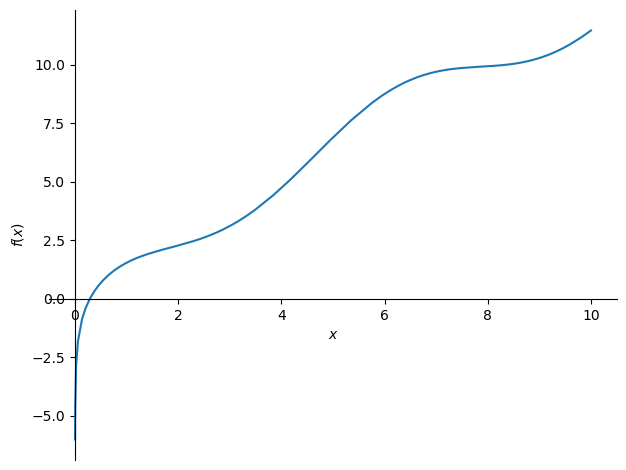

In [8]:
sympy.plot(unsolvable)

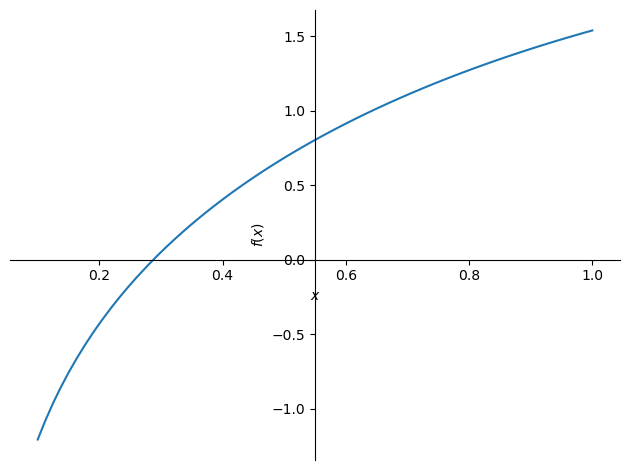

In [9]:
sympy.plot(unsolvable, (x, 0.1, 1))

In [10]:
sympy.nsolve(unsolvable, x, 0.3)

In [11]:
import scipy.optimize

In [12]:
plus_two = lambda x: x+2

In [13]:
plus_two(2)

In [14]:
def plus_two(x):
    return x + 2

In [15]:
unsolvable_numeric = sympy.lambdify(x, unsolvable)

In [16]:
unsolvable_numeric(0.3)

In [17]:
scipy.optimize.fsolve(unsolvable_numeric, 0.1)

array([0.28751828])

In [18]:
def multiple_equations(unknowns):
    x, y = unknowns
    return [x + y -1 ,
            x - y]

In [19]:
multiple_equations([1, 2])

In [20]:
first_guess =  [1, 1]
scipy.optimize.fsolve(multiple_equations, first_guess)

array([0.5, 0.5])

In [21]:
from IPython import display

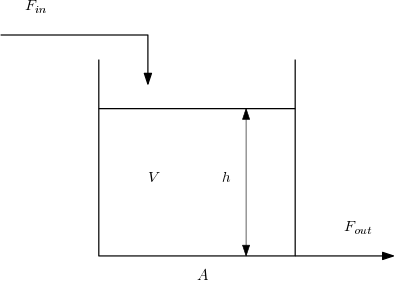

In [23]:
display.Image("./img/tanksystem.png")

$$ \begin{align}
F_{out} &= kh\\
\frac{\mathrm{d}h}{\mathrm{d}t} &= \frac{1}{A}\left(F_{in} - F_{out}\right)\\
\end{align}
$$

### Analytic Solution

In [24]:
h = sympy.Function('h') # This is how to specify an unknown function in sympy
t = sympy.Symbol('t', positive = True)

In [25]:
Fin = 2
K = 1
A = 1  

In [26]:
Fout = K*h(t)
Fout

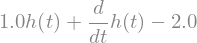

In [29]:
de = h(t).diff(t) - 1/A*(Fin - Fout)
de

In [30]:
solution = sympy.dsolve(de)
solution

In [31]:
C1 = solution.rhs.args[1].args[0]

In [32]:
h0 = 1

In [33]:
constants = sympy.solve(solution.rhs.subs({t: 0}) - h0, C1)
constants

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline

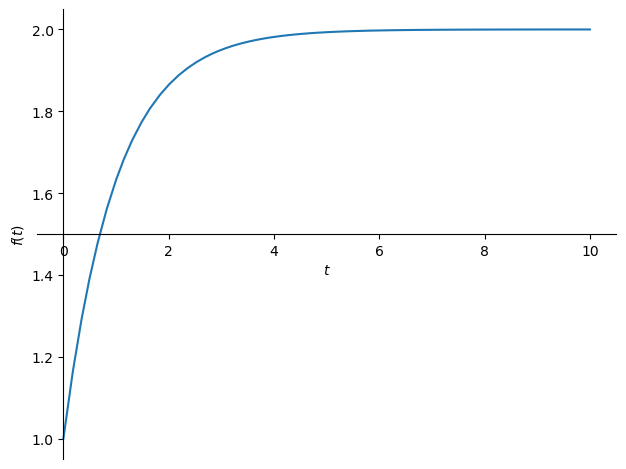

In [35]:
sympy.plot(solution.rhs.subs({C1: constants[0]}), (t, 0, 10))